In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [67]:
data = pd.read_csv('data.csv')

In [ ]:
# Mysterious empty column which cost me too much time and errors.
data.drop(columns=['Unnamed: 32'],inplace=True)

In [69]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [70]:
X = data.drop(columns= ['id','diagnosis']).values
y = data['diagnosis'].values

In [ ]:
# Just check in case for any error columns (u can even convert this to dataFrame for better analysis )
X 

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [ ]:
# Just check in case for any error
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [ ]:
# We do this for splitting this into ratio so we can determine whether our prediction is correct or not
X_train , X_test  , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

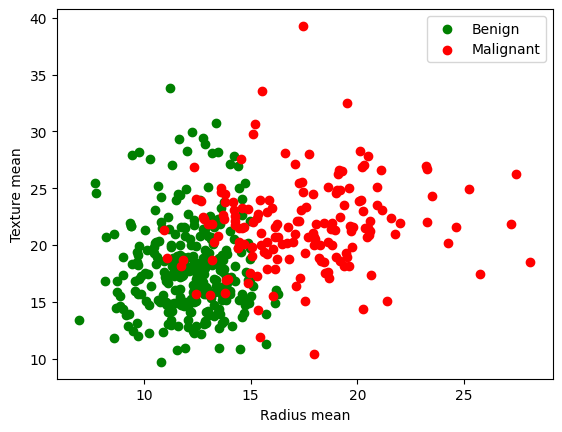

In [ ]:
# Plotting this for two features
plt.scatter(X_train[y_train == 'B',0],X_train[y_train == 'B',1],color='green',label='Benign')
plt.scatter(X_train[y_train == 'M',0],X_train[y_train == 'M',1],color='red',label='Malignant')
plt.xlabel('Radius mean')
plt.ylabel('Texture mean')
plt.legend()
plt.show()

In [74]:
def euclidean_distance(a,b):
    return np.sqrt(np.sum((b-a)**2))

In [75]:
class KNN:
    def __init__(self,k):
        self.k = k
    
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    def predict(self,new_points):
        predictions = [self.predict_class(new_point) for new_point in new_points]
        return np.array(predictions)
    
    def predict_class(self,new_point):
        distances = [euclidean_distance(point,new_point) for point in self.X_train]

        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

        most_common = Counter(k_nearest_labels).most_common(1)[0][0]

        return most_common

In [ ]:
# For Testing the best K value
# for i in range(1,10):
#     knn = KNN(i)
#     knn.fit(X_train,y_train)
#     predictions = knn.predict(X_test)
#     accuracy = np.mean(predictions == y_test )*100
#     print(f" Accuracy : {accuracy :.2f} %")

In [81]:
knn = KNN(7)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
accuracy = np.mean(predictions == y_test )*100
print(f" Accuracy : {accuracy :.2f} %")

 Accuracy : 92.98 %


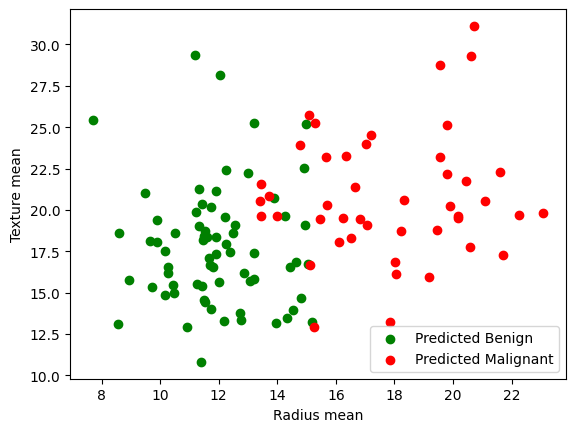

In [82]:
plt.scatter(X_test[predictions == 'B',0],X_test[predictions == 'B',1],color='green',label='Predicted Benign')
plt.scatter(X_test[predictions == 'M',0],X_test[predictions == 'M',1],color='red',label='Predicted Malignant')
plt.xlabel('Radius mean')
plt.ylabel('Texture mean')
plt.legend()
plt.show()